<a href="https://colab.research.google.com/github/SterlinPeter/YBI_Projects/blob/main/Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

#Import data

In [5]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#Visualizing Data

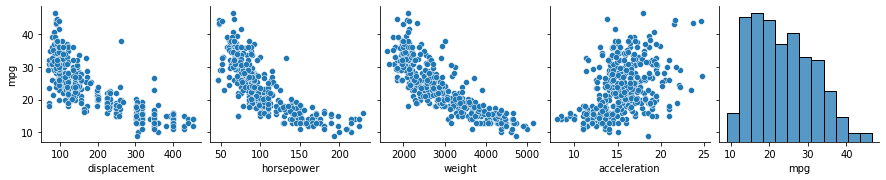

In [13]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

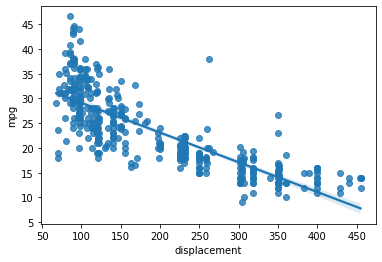

In [14]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

#Define X and y

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y = df['mpg']

In [17]:
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]

#Scaling Data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()

In [20]:
X = ss.fit_transform(X)

In [21]:
pd.DataFrame(X)

,0,1,2,3
0,1.077290,0.664133,0.620540,-1.285258
1,1.488732,1.574594,0.843334,-1.466724
2,1.182542,1.184397,0.540382,-1.648189
3,1.048584,1.184397,0.536845,-1.285258
4,1.029447,0.924265,0.555706,-1.829655
...,...,...,...,...
387,-0.520637,-0.480448,-0.221125,0.021294
388,-0.932079,-1.364896,-0.999134,3.287676
389,-0.568479,-0.532474,-0.804632,-1.430430
390,-0.712005,-0.662540,-0.415627,1.110088


#Split Data

In [22]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 192529)

#Import Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
lr.intercept_

23.437146205102994

In [50]:
lr.coef_

array([-0.73968786, -1.55093211, -4.50839935, -0.07836656])

#Predict Future Test Data

In [51]:
y_pred = lr.predict(X_test)

In [52]:
y_pred

array([23.45016622, 29.32516033, 29.77228603, 23.0718391 , 32.3593637 ,
       25.24968985, 20.74034177, 26.54954947, 17.17025746, 31.92262642,
       30.88896413, 26.1449333 , 19.87230263, 18.77607948, 24.4247408 ,
       25.84355402, 22.64405946, 30.33855651, 31.12842135, 18.21211578,
       20.0903295 , 23.5039348 , 28.25298432, 25.90374372, 23.65486026,
       23.32273141, 27.57934061, 16.50497922, 29.42111318, 16.15350044,
       12.87866486, 20.76943576, 31.1713373 , 29.03441886, 28.19954578,
       21.05677145, 26.50416653, 22.02322145, 18.91277922, 10.78430644,
       20.20297371, 29.52302663, 31.06050976, 27.28461911, 20.07498761,
       24.78915024, 11.4655348 , 24.17180976, 28.11869358, 24.8907223 ,
       29.63735313, 31.15887854, 15.0755352 , 24.06343493, 19.91348514,
        6.37144488, 30.06899066, 32.58758114, 10.46945996, 31.96229942,
       25.46524252, 29.50943062, 18.31291563, 31.25008487, 31.79137899,
       22.76114005, 20.7482228 , 29.26156892, 29.59453294, 25.85

#Get Model Evaluation

In [53]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,  r2_score

In [54]:
mean_absolute_error(y_test, y_pred)

3.368082071851848

In [55]:
mean_absolute_percentage_error(y_test, y_pred)

0.14857064524172603

In [56]:
r2_score(y_test, y_pred)

0.6746183746742351

#Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)

In [59]:
X_train2 = poly.fit_transform(X_train)

In [60]:
X_test2 = poly.fit_transform(X_test)

In [61]:
lr.fit(X_train2, y_train)

LinearRegression()

In [62]:
y_pred_poly = lr.predict(X_test2)

#Evaluate Model

In [63]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,  r2_score

In [64]:
mean_absolute_error(y_test, y_pred_poly)

2.9629512499051094

In [65]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.12344853660837707

In [66]:
r2_score(y_test, y_pred_poly)

0.730323067347721